In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

### 1.1 Data exploration with PCA

**1) Import and view the data. How many columns do you have? Which columns will you
use in your PCA?**

In [2]:
# 1)
pottery = pd.read_csv('Pottery.csv')

In [3]:
pottery.shape

(26, 7)

In [4]:
# There are 7 columns in the table

In [5]:
pottery

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


Before using the values for PCA, we need to pre-process the above data.

First column (Unnamed: 0) is identifier so we can drop them
After pre-processing, we can use the remaining columns for PCA

In [6]:
#2
# Drop columns
pottery.drop(columns = ['Unnamed: 0'], inplace = True)
pottery

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [7]:
pottery.set_index('Site', inplace=True)
pottery

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.00,4.30,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.20
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.20,0.20
Llanedyrn,10.9,6.26,3.47,0.17,0.22
Llanedyrn,10.1,4.26,4.26,0.20,0.18
Llanedyrn,11.6,5.78,5.91,0.18,0.16
Llanedyrn,11.1,5.49,4.52,0.29,0.30


**2) Pre-process the data and perform PCA with 3 PCs.**

In [8]:
scaler = StandardScaler()
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [9]:
pottery_scaled = scaler.fit_transform(pottery)
pottery_scaled

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

Running the Principal Component Analysis below

In [10]:
pca = PCA(n_components=3, svd_solver='full')

In [11]:
pca_scores = pca.fit_transform(pottery_scaled)

In [12]:
pca_scores.shape

(26, 3)

The number of columns has now changed to 3 for PCA

In [13]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = pottery.index)
scores_pd

,PC1,PC2,PC3
Site,,,
Llanedyrn,-1.778026,2.289445,-0.075289
Llanedyrn,-0.611193,0.122065,-0.499044
Llanedyrn,-0.722428,0.370209,-0.207550
Llanedyrn,-1.417696,-0.555600,-0.557590
Llanedyrn,-1.486801,-0.004081,0.195248
Llanedyrn,-1.259044,-0.092347,-0.783259
Llanedyrn,-1.180703,-0.607921,-0.575010
Llanedyrn,-1.490385,-0.498745,-0.336582
Llanedyrn,-2.076010,0.000500,0.220714


**Etracting the loadings**

In [14]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = pottery.columns)
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


**3) Plot the cumulative explained variance graph. What percent of the variance do the
first 2 and 3 components describe?**

In [15]:
#3)
pca.explained_variance_

array([4.03290887, 0.63316224, 0.25395987])

In [16]:
pca.explained_variance_ratio_*100

array([77.55593977, 12.17619687,  4.88384364])

In [17]:
pca10 = PCA(n_components=4, svd_solver='full')

In [18]:
pca10.fit(pottery_scaled)

PCA(n_components=4, svd_solver='full')

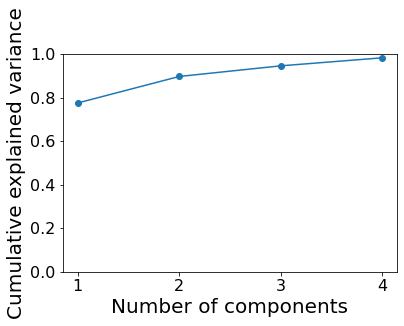

In [19]:
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

It can be observed from the variance that the eigen values are reducing which are a part of PCA.
The variance ratio tells us that the first component captures 77.5% of the information, the second captures 12.1% and so on.
Cummulatively, 95% of the information is captured by the 3 components which makes the model good.

**4) Plotting the scores and loading**

In [20]:
#4)

In [21]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
   
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

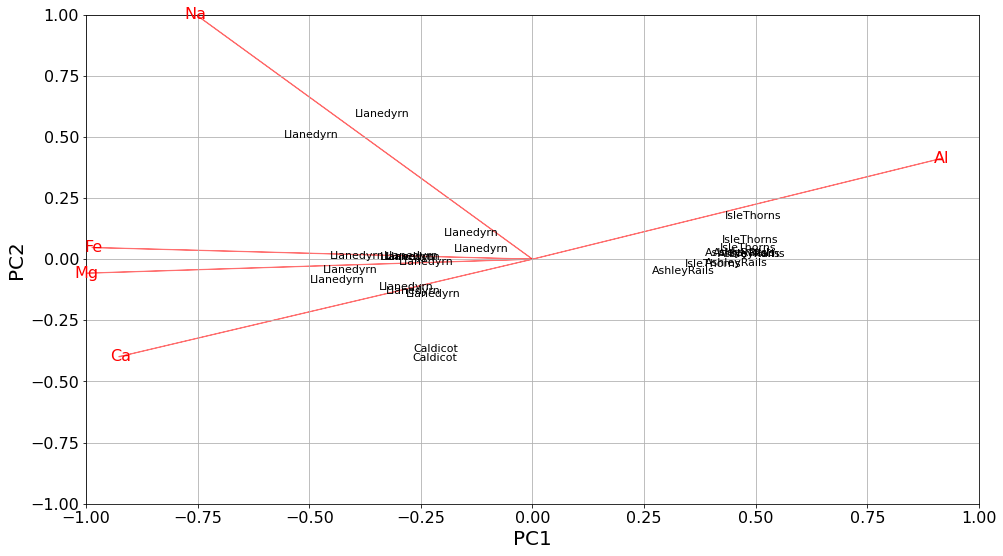

In [22]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

The above plot shows the PCA for 2 components

**5) How does the map of scores-loadings explains the reason that your company uses the
raw material from Isle Thorns and Ashley Rails to manufacture Product B?**

It can be inferred from the plot that only Aluminimum is present in Isle Thorns and Ashley Rails.
Therefore the raw material obtained from Isle Thorns and Ashley Rails to manufacture product B is Aluminium. 
This means that the other raw materials (Fe,Mg,Ca and Na) are concentrated elsewhere(Llanedyrn and caldicot)



**6) Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and
why?**

If we look at the graph as a whole, the raw material from Caldicot could be a good replacement for Llanedyrn since they can be seen alligned towards the same direction and are closer.
However, being specific with the elements, even though Caldicot has an average concentration of Mg, Fe, and Na, it is mailnly rich in Calcium.
This could lead to the manufacturing of a different product from what Llanedyrn gives.
So if Llanedyrn will be closing for maintenance, caldicot could be a temporary alternative but it may give rise to a different product.


**7) What are the biggest dierences in the two big clusters? How are the two samples
from the candidate Caldicot dierent than the Llanedyrn samples?**

The two caldicot samples are extremely rich in Calcium although it has notable traces of Na,Fe and Mg whereas the samples from Llanedyrn has an average concentration of all the raw materials such as Na, Fe, Mg and Ca. It is mainly rich in Sodium.

**8) Confirm the answers by producing the boxplot of the 5 variables grouped by the site
of the raw material shown below.**

In [23]:
#8)
pottery_1 = pd.read_csv('Pottery.csv')
pottery_1

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [24]:
table1 = pd.pivot_table(pottery_1,values='Al',index=['Unnamed: 0'],columns=['Site'])
table1

Site,AshleyRails,Caldicot,IsleThorns,Llanedyrn
Unnamed: 0,,,,
1,NaN,NaN,NaN,14.4
2,NaN,NaN,NaN,13.8
3,NaN,NaN,NaN,14.6
4,NaN,NaN,NaN,11.5
5,NaN,NaN,NaN,13.8
6,NaN,NaN,NaN,10.9
7,NaN,NaN,NaN,10.1
8,NaN,NaN,NaN,11.6
9,NaN,NaN,NaN,11.1


Text(0.5, 1.0, 'Al')

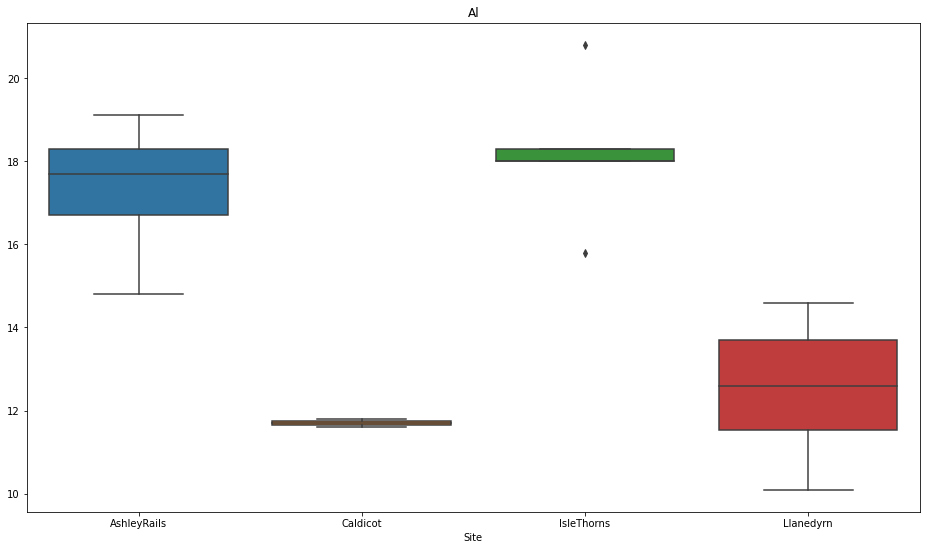

In [25]:
sns.boxplot(data = table1)
plt.title('Al')

The above diagram is the box plot of Aluminium from 5 different locations

In [26]:
table2 = pd.pivot_table(pottery_1,values='Fe',index=['Unnamed: 0'],columns=['Site'])
table2

Site,AshleyRails,Caldicot,IsleThorns,Llanedyrn
Unnamed: 0,,,,
1,NaN,NaN,NaN,7.00
2,NaN,NaN,NaN,7.08
3,NaN,NaN,NaN,7.09
4,NaN,NaN,NaN,6.37
5,NaN,NaN,NaN,7.06
6,NaN,NaN,NaN,6.26
7,NaN,NaN,NaN,4.26
8,NaN,NaN,NaN,5.78
9,NaN,NaN,NaN,5.49


Text(0.5, 1.0, 'Fe')

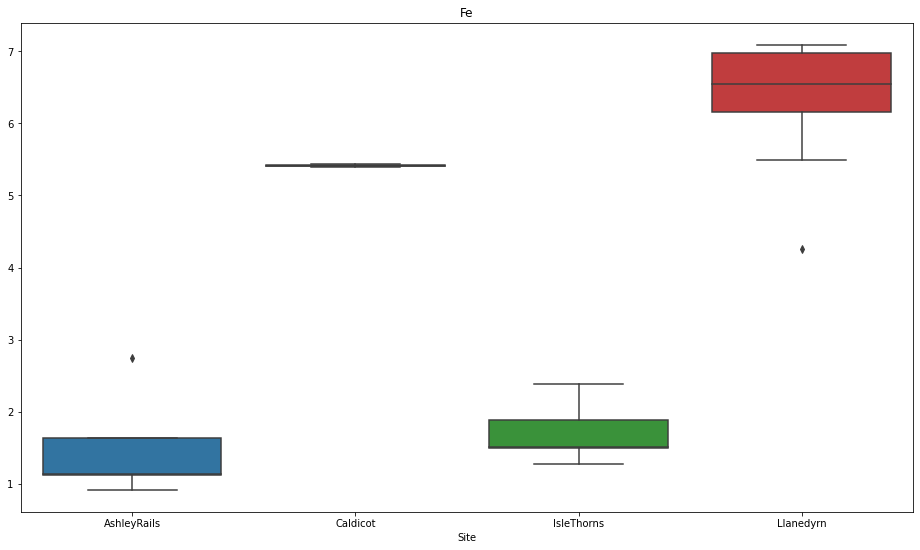

In [27]:
sns.boxplot(data = table2)
plt.title('Fe')

The above diagram is the box plot of Iron from 5 different locations

In [28]:
table3 = pd.pivot_table(pottery_1,values='Mg',index=['Unnamed: 0'],columns=['Site'])
table3

Site,AshleyRails,Caldicot,IsleThorns,Llanedyrn
Unnamed: 0,,,,
1,NaN,NaN,NaN,4.30
2,NaN,NaN,NaN,3.43
3,NaN,NaN,NaN,3.88
4,NaN,NaN,NaN,5.64
5,NaN,NaN,NaN,5.34
6,NaN,NaN,NaN,3.47
7,NaN,NaN,NaN,4.26
8,NaN,NaN,NaN,5.91
9,NaN,NaN,NaN,4.52


Text(0.5, 1.0, 'Mg')

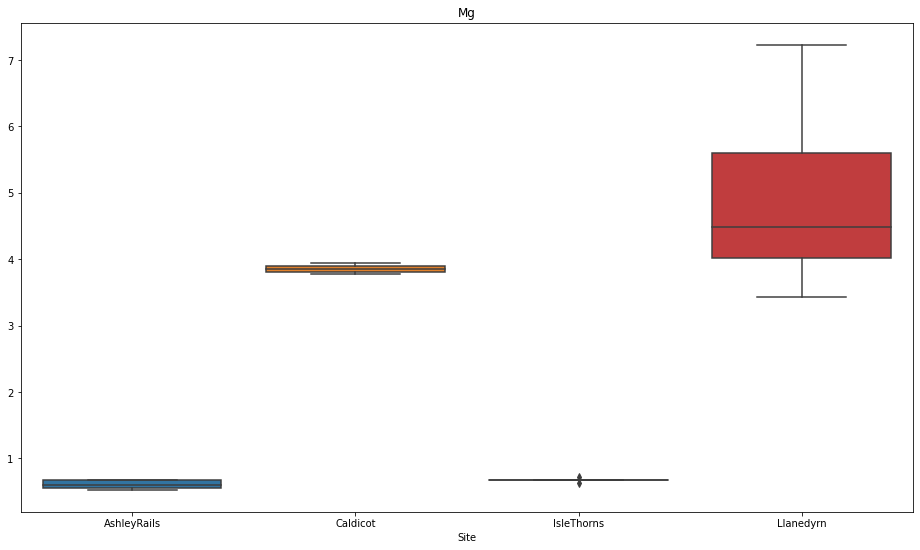

In [29]:
sns.boxplot(data = table3)
plt.title('Mg')

The above diagram is the box plot of Magnesium from 5 different locations

In [30]:
table4 = pd.pivot_table(pottery_1,values='Ca',index=['Unnamed: 0'],columns=['Site'])
table4

Site,AshleyRails,Caldicot,IsleThorns,Llanedyrn
Unnamed: 0,,,,
1,NaN,NaN,NaN,0.15
2,NaN,NaN,NaN,0.12
3,NaN,NaN,NaN,0.13
4,NaN,NaN,NaN,0.16
5,NaN,NaN,NaN,0.20
6,NaN,NaN,NaN,0.17
7,NaN,NaN,NaN,0.20
8,NaN,NaN,NaN,0.18
9,NaN,NaN,NaN,0.29


Text(0.5, 1.0, 'Ca')

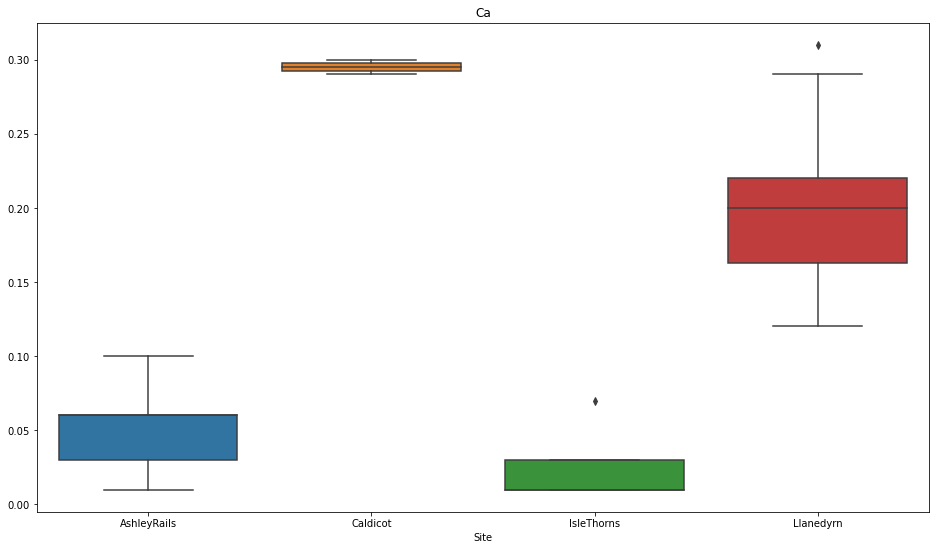

In [31]:
sns.boxplot(data = table4)
plt.title('Ca')

The above diagram is the box plot of Calcium from 5 different locations

In [32]:
table5 = pd.pivot_table(pottery_1,values='Na',index=['Unnamed: 0'],columns=['Site'])
table5

Site,AshleyRails,Caldicot,IsleThorns,Llanedyrn
Unnamed: 0,,,,
1,NaN,NaN,NaN,0.51
2,NaN,NaN,NaN,0.17
3,NaN,NaN,NaN,0.20
4,NaN,NaN,NaN,0.14
5,NaN,NaN,NaN,0.20
6,NaN,NaN,NaN,0.22
7,NaN,NaN,NaN,0.18
8,NaN,NaN,NaN,0.16
9,NaN,NaN,NaN,0.30


Text(0.5, 1.0, 'Na')

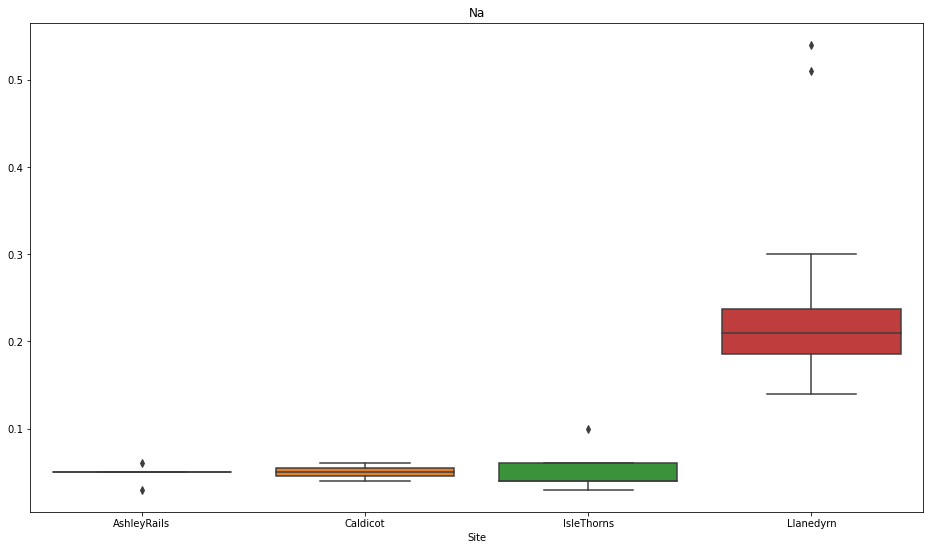

In [33]:
sns.boxplot(data = table5)
plt.title('Na')

The above diagram is the box plot of Sodium from 5 different locations